#### NC Statewide Stay at Home Order (Mar 27, 2020)
* https://www.ncdhhs.gov/news/press-releases/governor-cooper-announces-statewide-stay-home-order-until-april-29

### Treatment: 
* NC (population: 10.6) - 3/27/2020

### Control (Stay-At-Home Order Announced After 3/27/2020): 
* VA (population: 8.59) - 3/30/2020

* GA (population:10.71) - 4/3/2020

* SC (population: 5.22) - 4/7/2020

Population Reference (Population data are based on resident population of the U.S. in 2020, by state (in millions))
* https://www.statista.com/statistics/183497/population-in-the-federal-states-of-the-us/

Stay-At-Home Order References
* https://www.usatoday.com/storytelling/coronavirus-reopening-america-map/

In [1]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import datetime
import os
import sys
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# load data for covid cases
daily_cases = pd.read_csv("./data/us-counties-covid-cases.csv")
# treatment - NC
daily_cases_NC = daily_cases[daily_cases["state"] == "North Carolina"]
# control - VA, GA, SC
daily_cases_VA = daily_cases[daily_cases["state"] == "Virginia"]
daily_cases_GA = daily_cases[daily_cases["state"] == "Georgia"]
daily_cases_SC = daily_cases[daily_cases["state"] == "South Carolina"]

<IPython.core.display.Javascript object>

In [3]:
daily_cases_VA.sample(5)

,date,county,state,fips,cases,deaths
32957,2020-04-04,Loudoun,Virginia,51107.0,150,0.0
359937,2020-07-22,Carroll,Virginia,51035.0,281,10.0
972122,2021-01-27,New Kent,Virginia,51127.0,1018,7.0
379267,2020-07-28,Northumberland,Virginia,51133.0,60,1.0
376022,2020-07-27,Henrico,Virginia,51087.0,3371,178.0


<IPython.core.display.Javascript object>

In [4]:
daily_cases_GA.sample(5)

,date,county,state,fips,cases,deaths
1040980,2021-02-18,Hancock,Georgia,13141.0,859,55.0
528451,2020-09-13,Pierce,Georgia,13229.0,563,15.0
1122127,2021-03-15,Habersham,Georgia,13137.0,5056,145.0
739149,2020-11-17,Gwinnett,Georgia,13135.0,36516,497.0
383170,2020-07-30,Glascock,Georgia,13125.0,21,0.0


<IPython.core.display.Javascript object>

In [5]:
daily_cases_SC.sample(5)

,date,county,state,fips,cases,deaths
283126,2020-06-28,Anderson,South Carolina,45007.0,563,10.0
724896,2020-11-12,Clarendon,South Carolina,45027.0,1275,69.0
679508,2020-10-29,Marion,South Carolina,45067.0,1163,41.0
186868,2020-05-28,Aiken,South Carolina,45003.0,189,7.0
533619,2020-09-14,Kershaw,South Carolina,45055.0,1767,36.0


<IPython.core.display.Javascript object>

In [6]:
# load population data
pop =  pd.read_excel("./co-est2019-annres.xlsx",  header=[0,1,2,3])
pop.columns = pop.columns.droplevel([0,1,2])
pop.rename(columns={"Unnamed: 0_level_3": "Geographic Area"}, inplace = True)
pop["Geographic Area"] = pop["Geographic Area"].str.replace('.','', regex=True)

<IPython.core.display.Javascript object>

In [7]:
# subset population data to NC
pop_NC = pop[pop['Geographic Area'].str.contains("North Carolina")]
# use 2019 population
pop_NC = pop_NC.iloc[:, [0] + [-1]]
# rename county column
pop_NC['Geographic Area'] = pop_NC['Geographic Area'].str.replace(' County, North Carolina', '')
# rename dataframe columnes 
pop_NC.columns = ['County', 'population']

# subset population data to VA
pop_VA = pop[pop['Geographic Area'].str.contains(", Virginia")]
pop_VA = pop_VA.iloc[:-1]
# use 2019 population
pop_VA = pop_VA.iloc[:, [0] + [-1]]
# rename county column
pop_VA['Geographic Area'] = pop_VA['Geographic Area'].str.replace(' County, Virginia', '')
pop_VA['Geographic Area'] = pop_VA['Geographic Area'].str.replace(', Virginia', '')
# rename dataframe columnes 
pop_VA.columns = ['County', 'population']

# subset population data to GA 
pop_GA = pop[pop['Geographic Area'].str.contains("Georgia")]
# use 2019 population
pop_GA = pop_GA.iloc[:, [0] + [-1]]
# rename county column
pop_GA['Geographic Area'] = pop_GA['Geographic Area'].str.replace(' County, Georgia', '')
# rename dataframe columnes 
pop_GA.columns = ['County', 'population']

# subset population data to SC
pop_SC = pop[pop['Geographic Area'].str.contains("South Carolina")]
# use 2019 population
pop_SC = pop_SC.iloc[:, [0] + [-1]]
# rename county column
pop_SC['Geographic Area'] = pop_SC['Geographic Area'].str.replace(' County, South Carolina', '')
# rename dataframe columnes 
pop_SC.columns = ['County', 'population']

<IPython.core.display.Javascript object>

In [8]:
# remove uknown counties
daily_cases_NC = daily_cases_NC[daily_cases_NC['county']!='Unknown']
daily_cases_GA = daily_cases_GA[daily_cases_GA['county']!='Unknown']
daily_cases_SC = daily_cases_SC[daily_cases_SC['county']!='Unknown']
daily_cases_VA = daily_cases_VA[daily_cases_VA['county']!='Unknown']

<IPython.core.display.Javascript object>

In [9]:
# make sure counties are matching in COVID cases & population datasets
sorted(pop_NC.County.unique()) == sorted(daily_cases_NC.county.unique())

True

<IPython.core.display.Javascript object>

In [10]:
sorted(pop_GA.County.unique()) == sorted(daily_cases_GA.county.unique())

True

<IPython.core.display.Javascript object>

In [11]:
sorted(pop_SC.County.unique()) == sorted(daily_cases_SC.county.unique())

True

<IPython.core.display.Javascript object>

In [12]:
sorted(pop_VA.County.unique()) == sorted(daily_cases_VA.county.unique())

True

<IPython.core.display.Javascript object>

In [13]:
# set comparison period to be 21 days
numdays = 21

<IPython.core.display.Javascript object>

In [14]:
# retrieve policy date for NC Stay at Home Order
policy_nc = datetime.datetime.strptime('27032020', "%d%m%Y").date()
date_before_nc = [policy_nc - datetime.timedelta(days=x) for x in range(numdays+1)]
date_after_nc = [policy_nc + datetime.timedelta(days=x) for x in range(numdays+1)]
date_list_nc = date_before_nc + date_after_nc

# data cleaning - treatment state: NC
daily_nc = daily_cases_NC.copy()
daily_nc["date"] = pd.to_datetime(daily_nc["date"])
daily_nc_timed = daily_nc.loc[daily_nc["date"].isin(date_list_nc)] # covering a total of 43 days (21 + 21 + 1)

# merge NC population with COVID cases
merged_NC = pd.merge(left=daily_nc_timed, right=pop_NC, how='left', left_on='county', right_on='County')

# drop duplicated NC County column
merged_NC = merged_NC.drop('County', axis=1)
# create NC standardized COVID cases column
merged_NC['cases_standardized'] = merged_NC['cases']/merged_NC['population']*10000

# create indicator variable - pre and post policy annoucement
merged_NC['post_policy'] = (merged_NC.date > '2020-03-27')
merged_NC.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
411,2020-03-26,Montgomery,North Carolina,37123.0,3,0.0,27173.0,1.104037,False
1261,2020-04-06,Onslow,North Carolina,37133.0,18,1.0,197938.0,0.909376,True
403,2020-03-26,Hoke,North Carolina,37093.0,2,0.0,55234.0,0.362096,False
2069,2020-04-15,Lenoir,North Carolina,37107.0,14,0.0,55949.0,2.502279,True
676,2020-03-30,Orange,North Carolina,37135.0,30,0.0,148476.0,2.020529,True


<IPython.core.display.Javascript object>

In [15]:
# data cleaning - control state: VA
daily_va = daily_cases_VA.copy()
daily_va["date"] = pd.to_datetime(daily_va["date"])
daily_va_timed = daily_va.loc[daily_va["date"].isin(date_list_nc)]

# merge VA population with COVID cases
merged_VA = pd.merge(left=daily_va_timed, right=pop_VA, how='left', left_on='county', right_on='County')

# drop duplicated VA County column
merged_VA = merged_VA.drop('County', axis=1)
# create VA standardized COVID cases column
merged_VA['cases_standardized'] = merged_VA['cases']/merged_VA['population']*10000

# create indicator variable - pre and post policy annoucement
merged_VA['post_policy'] = (merged_VA.date > '2020-03-27')
merged_VA.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
1171,2020-04-04,Henrico,Virginia,51087.0,174,16.0,330818.0,5.259690,True
2532,2020-04-15,Suffolk city,Virginia,51800.0,59,0.0,92108.0,6.405524,True
1151,2020-04-04,Culpeper,Virginia,51047.0,8,0.0,52605.0,1.520768,True
705,2020-03-30,Portsmouth city,Virginia,51740.0,4,0.0,94398.0,0.423738,True
2507,2020-04-15,Pittsylvania,Virginia,51143.0,4,0.0,60354.0,0.662756,True


<IPython.core.display.Javascript object>

In [16]:
# data cleaning - control state: GA
daily_ga = daily_cases_GA.copy()
daily_ga["date"] = pd.to_datetime(daily_ga["date"])
daily_ga_timed = daily_ga.loc[daily_ga["date"].isin(date_list_nc)] 

# merge GA population with COVID cases
merged_GA = pd.merge(left=daily_ga_timed, right=pop_GA, how='left', left_on='county', right_on='County')

# drop duplicated GA County column
merged_GA = merged_GA.drop('County', axis=1)
# create GA standardized COVID cases column
merged_GA['cases_standardized'] = merged_GA['cases']/merged_GA['population']*10000

# create indicator variable - pre and post policy annoucement
merged_GA['post_policy'] = (merged_GA.date > '2020-03-27')
merged_GA.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
3146,2020-04-13,Appling,Georgia,13001.0,13,0.0,18386.0,7.070597,True
1926,2020-04-05,Calhoun,Georgia,13037.0,17,1.0,6189.0,27.468089,True
3393,2020-04-14,Lowndes,Georgia,13185.0,70,3.0,117406.0,5.962217,True
775,2020-03-27,Greene,Georgia,13133.0,1,0.0,18324.0,0.545732,False
797,2020-03-27,Macon,Georgia,13193.0,1,0.0,12947.0,0.772380,False


<IPython.core.display.Javascript object>

In [17]:
# data cleaning - control state: SC
daily_sc = daily_cases_SC.copy()
daily_sc["date"] = pd.to_datetime(daily_sc["date"])
daily_sc_timed = daily_sc.loc[daily_sc["date"].isin(date_list_nc)]

# merge SC population with COVID cases
merged_SC = pd.merge(left=daily_sc_timed, right=pop_SC, how='left', left_on='county', right_on='County')

# drop duplicated SC County column
merged_SC = merged_SC.drop('County', axis=1)
# create SC standardized COVID cases column
merged_SC['cases_standardized'] = merged_SC['cases']/merged_SC['population']*10000

# create indicator variable - pre and post policy annoucement
merged_SC['post_policy'] = (merged_SC.date > '2020-03-27')
merged_SC.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
924,2020-04-09,Jasper,South Carolina,45053.0,11,0.0,30073.0,3.657766,True
201,2020-03-23,Horry,South Carolina,45051.0,16,0.0,354081.0,0.451874,False
831,2020-04-07,Horry,South Carolina,45051.0,91,6.0,354081.0,2.570033,True
256,2020-03-25,Beaufort,South Carolina,45013.0,26,0.0,192122.0,1.353307,False
705,2020-04-04,Orangeburg,South Carolina,45075.0,26,0.0,86175.0,3.017116,True


<IPython.core.display.Javascript object>

In [18]:
# stack 3 control states
merged_control = merged_VA.append([merged_GA, merged_SC])
merged_control.sample(5)

,date,county,state,fips,cases,deaths,population,cases_standardized,post_policy
2687,2020-04-17,Caroline,Virginia,51033.0,11,0.0,30725.0,3.580146,True
2029,2020-04-05,Stewart,Georgia,13259.0,1,0.0,6621.0,1.510346,True
1970,2020-04-11,Franklin,Virginia,51067.0,14,0.0,56042.0,2.498126,True
1071,2020-04-03,Lancaster,Virginia,51103.0,1,0.0,10603.0,0.943129,True
2367,2020-04-14,Madison,Virginia,51113.0,7,0.0,13261.0,5.278637,True


<IPython.core.display.Javascript object>

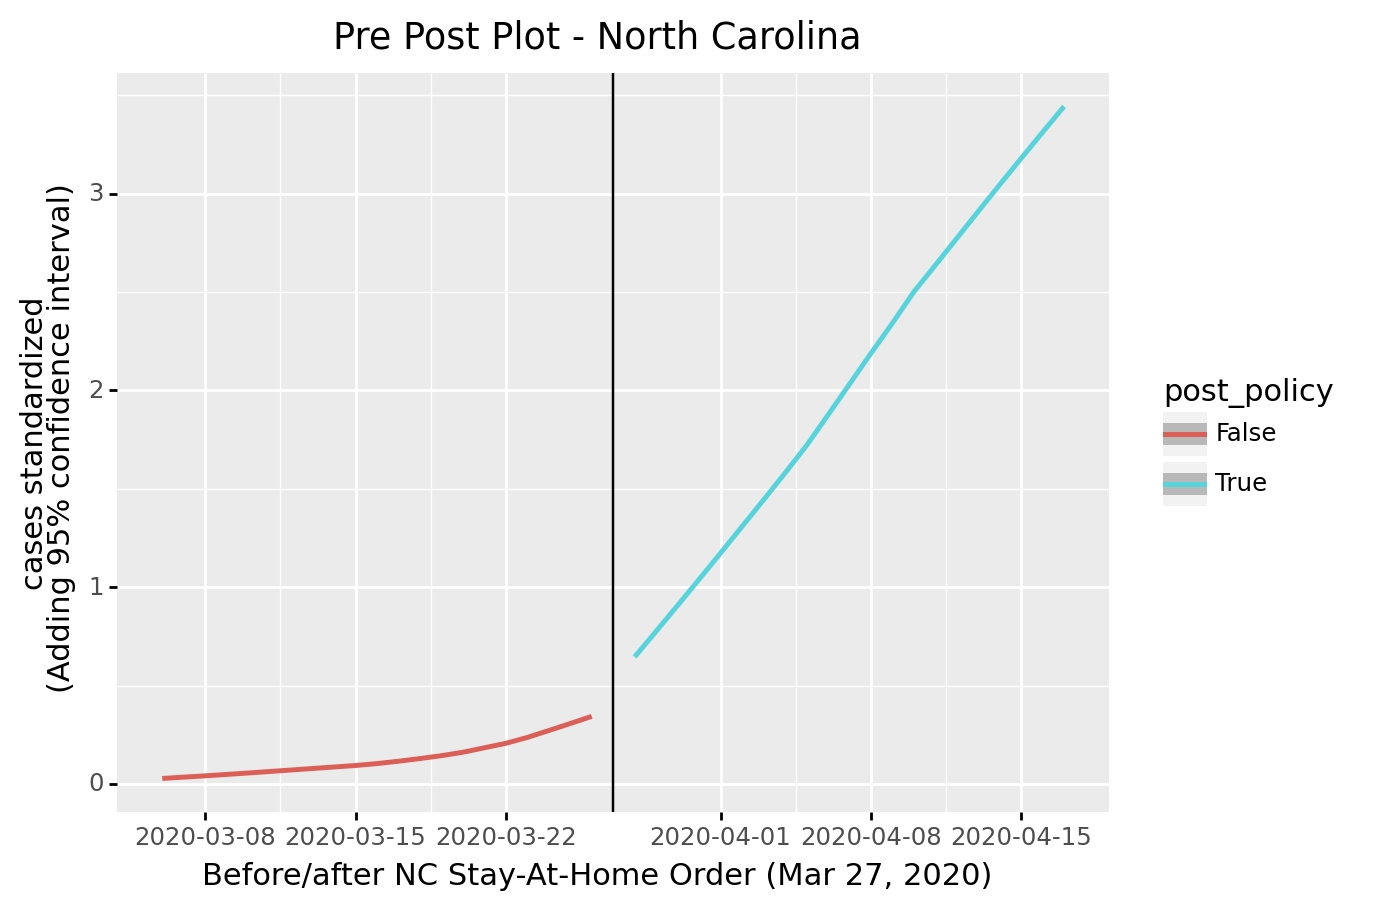

<ggplot: (8781488456334)>

<IPython.core.display.Javascript object>

In [19]:
# pre-post plot - NC
(ggplot() +
    geom_smooth(merged_NC[merged_NC['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='post_policy'), method='lowess') + 
    geom_smooth(merged_NC[merged_NC['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='post_policy'), method='lowess')
    + xlab('Before/after NC Stay-At-Home Order (Mar 27, 2020)') 
    + ylab(str("cases standardized") + ' \n(Adding 95% confidence interval)')
    + geom_vline(xintercept = '2020-03-27')
    + labs(title=str("Pre Post Plot - North Carolina")))

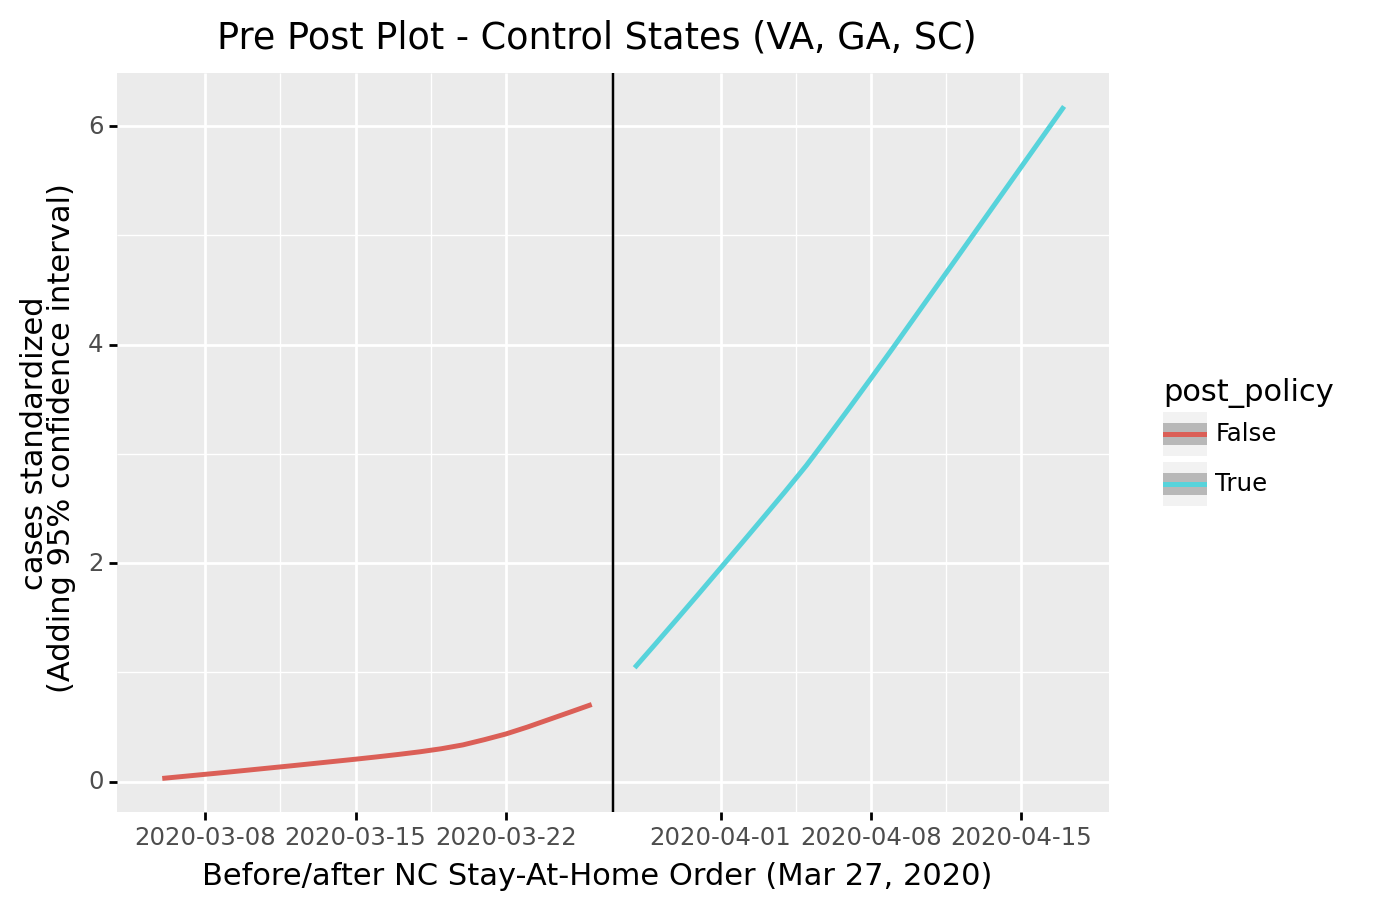

<ggplot: (8781494685823)>

<IPython.core.display.Javascript object>

In [20]:
# pre-post plot - control States (VA, GA, SC)
(ggplot() +
    geom_smooth(merged_control[merged_control['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='post_policy'), method='lowess') + 
    geom_smooth(merged_control[merged_control['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='post_policy'), method='lowess')
    + xlab('Before/after NC Stay-At-Home Order (Mar 27, 2020)') 
    + ylab(str("cases standardized") + ' \n(Adding 95% confidence interval)')
    + geom_vline(xintercept = '2020-03-27')
    + labs(title=str("Pre Post Plot - Control States (VA, GA, SC)")))

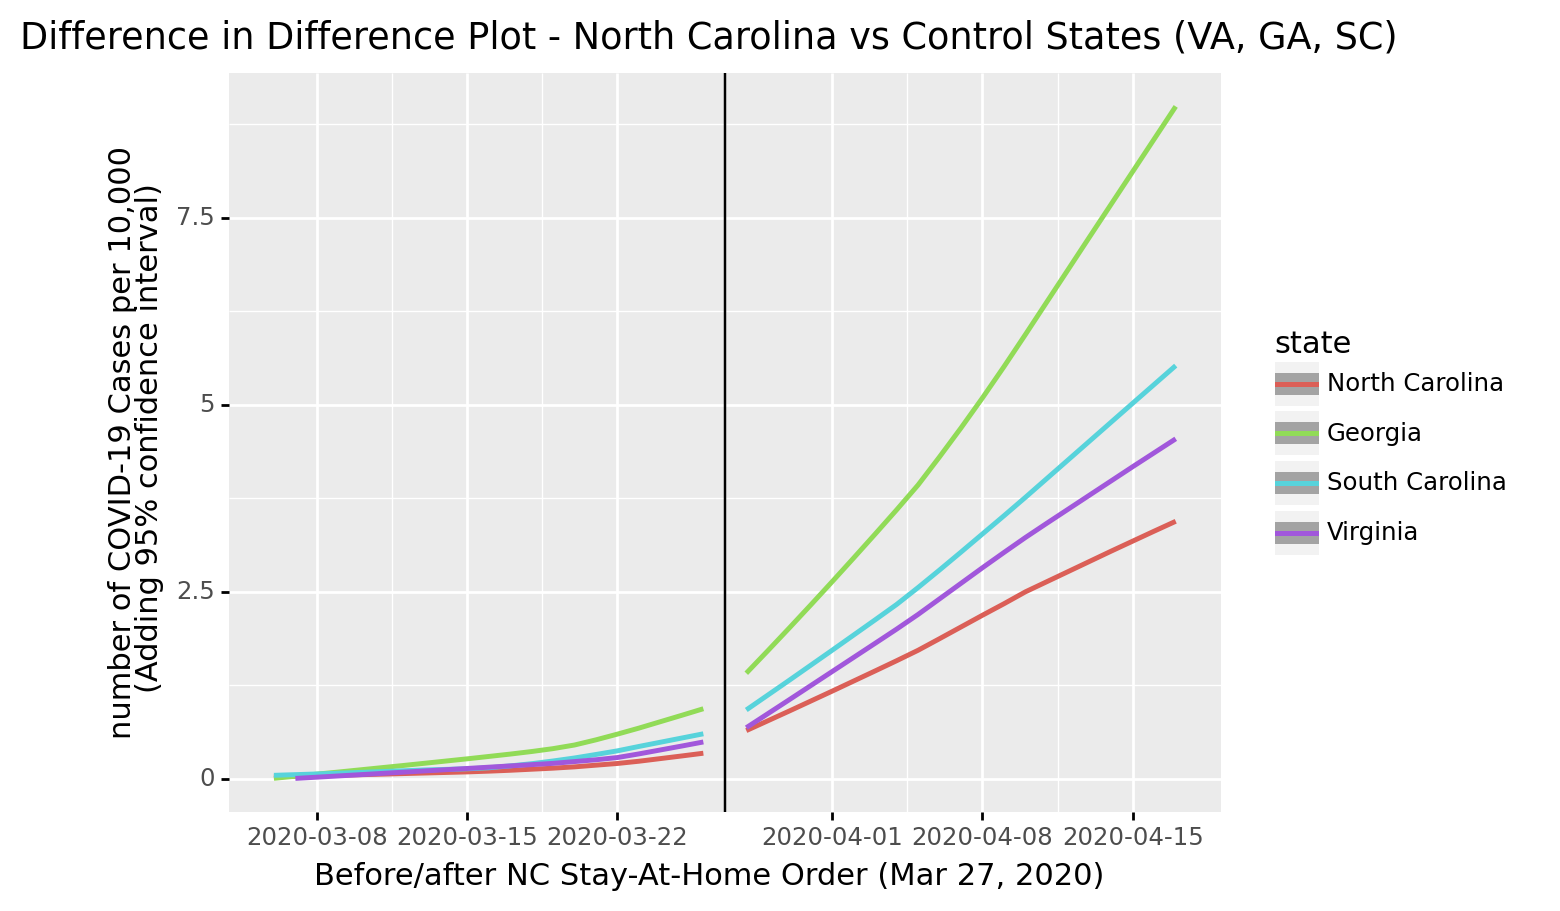

<ggplot: (8781494723825)>

<IPython.core.display.Javascript object>

In [21]:
# diff-in-diff plot - NC vs control counties
(ggplot() +
    geom_smooth(merged_NC[merged_NC['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='state'), method='lowess') + 
    geom_smooth(merged_NC[merged_NC['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='state'), method='lowess') + 
        
    geom_smooth(merged_control[merged_control['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='state'), method='lowess') + 
    geom_smooth(merged_control[merged_control['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='state'), method='lowess')
    + geom_vline(xintercept = '2020-03-27')
    + xlab('Before/after NC Stay-At-Home Order (Mar 27, 2020)')
    + ylab(str("number of COVID-19 Cases per 10,000") + ' \n(Adding 95% confidence interval)')
    + labs(title=str("Difference in Difference Plot - North Carolina vs Control States (VA, GA, SC)")))

In [22]:
# create indicator variable for treatment and control state
merged_NC['State'] = "North Carolina"
merged_control['State'] = "Control States"

<IPython.core.display.Javascript object>

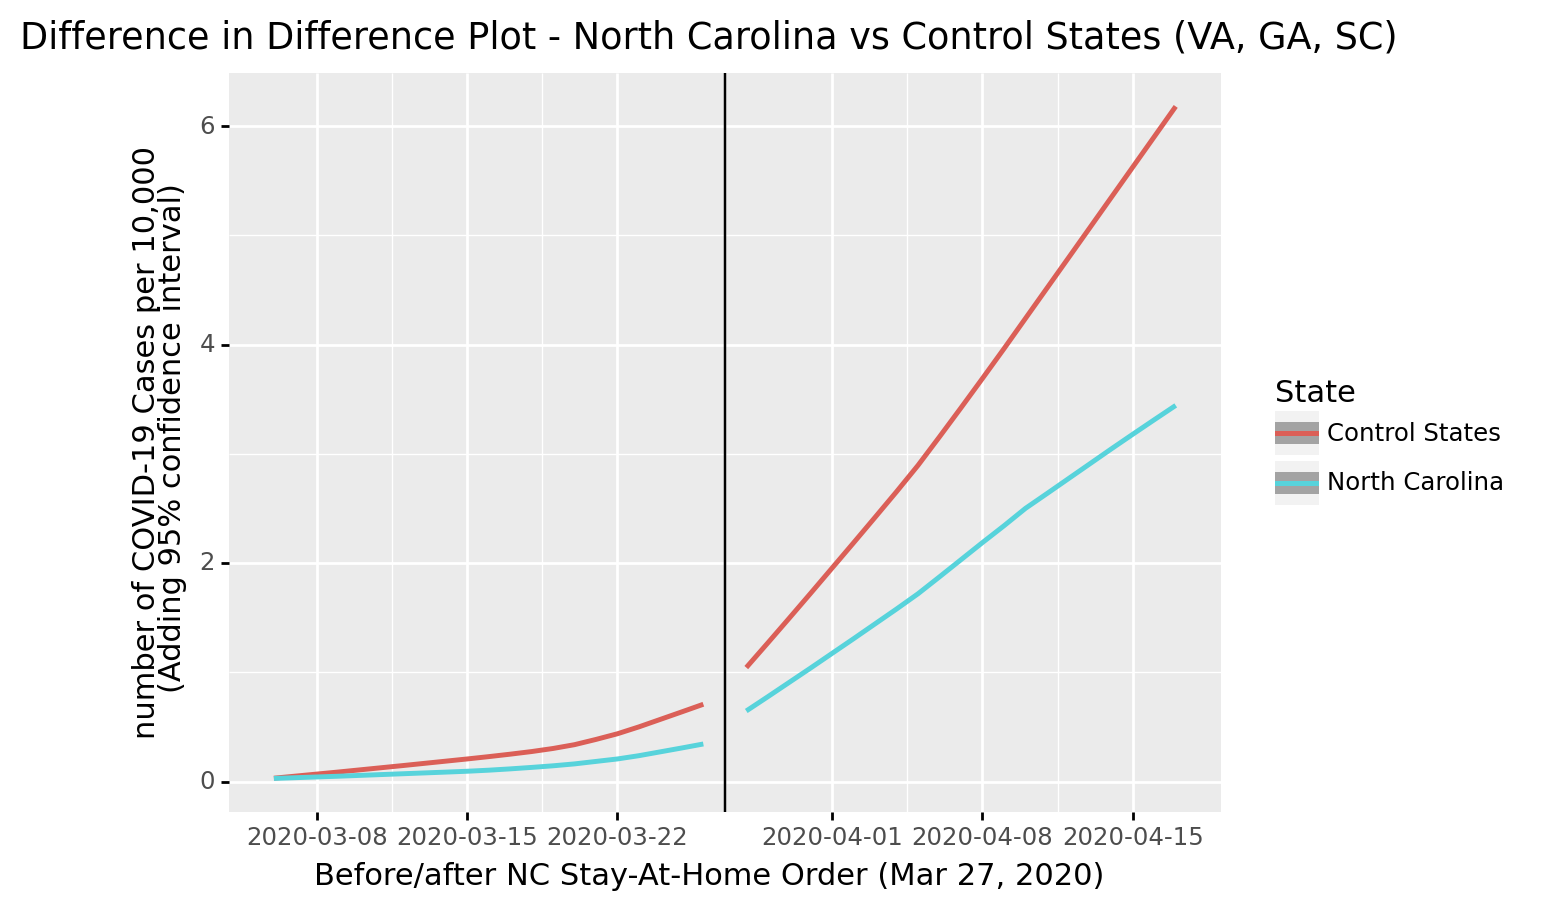

<ggplot: (8781488334192)>

<IPython.core.display.Javascript object>

In [23]:
# diff-in-diff plot - NC vs control counties
(ggplot() +
    geom_smooth(merged_control[merged_control['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='State'), method='lowess') + 
    geom_smooth(merged_control[merged_control['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='State'), method='lowess') +
    geom_smooth(merged_NC[merged_NC['date'] < '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='State'), method='lowess') + 
    geom_smooth(merged_NC[merged_NC['date'] > '2020-03-27'], 
                aes(x='date', y='cases_standardized', color='State'), method='lowess') 
    + geom_vline(xintercept = '2020-03-27')
    + xlab('Before/after NC Stay-At-Home Order (Mar 27, 2020)')
    + ylab(str("number of COVID-19 Cases per 10,000") + ' \n(Adding 95% confidence interval)')
    + labs(title=str("Difference in Difference Plot - North Carolina vs Control States (VA, GA, SC)")))